In [10]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.datasets import load_diabetes
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score

In [11]:
d = load_diabetes()
d

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [20]:
df = pd.DataFrame(d['data'],columns=d['feature_names'])
df['diabetes'] = d['target']

In [21]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


# Seggresion of x and y

In [22]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [24]:
x = df.drop(columns=['diabetes'])
y = df['diabetes']

In [25]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [26]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: diabetes, Length: 442, dtype: float64

# train test split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state =1)

In [28]:
print(x_train.shape,y_test.shape)
print(y_train.shape,x_test.shape)

(353, 10) (89,)
(353,) (89, 10)


In [29]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
o = lr.coef_
o

array([ -30.62219046, -272.2506057 ,  528.85252681,  327.69716891,
       -581.01973841,  332.97061365,  -27.97314298,  139.28036115,
        665.07667773,   61.90517166])

In [31]:
lr.intercept_

151.4300932966009

In [34]:
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.4384316213369279

In [35]:
y_pred_train = lr.predict(x_train)
r2_score(y_train,y_pred_train)

0.533228363691215

In [36]:
lr_error = mse(y_train,y_pred_train)
lr_error

2835.0372206252887

In [37]:
lr.coef_

array([ -30.62219046, -272.2506057 ,  528.85252681,  327.69716891,
       -581.01973841,  332.97061365,  -27.97314298,  139.28036115,
        665.07667773,   61.90517166])

In [39]:
r = Ridge()
r.fit(x_train,y_train)
print(r.coef_)
mse(y_train,r.predict(x_train))

[  30.19981099  -80.82971861  290.03134528  186.97053338   10.52007866
  -21.99921707 -151.22058789  116.91058436  241.96391279  110.24829294]


3334.2069898970035

[57.20276957976651, 59.683593951926035, 61.528384285596736, 64.05249644485737, 67.29229186784325, 68.85143378654625, 69.7660275592268, 71.70505804791851]


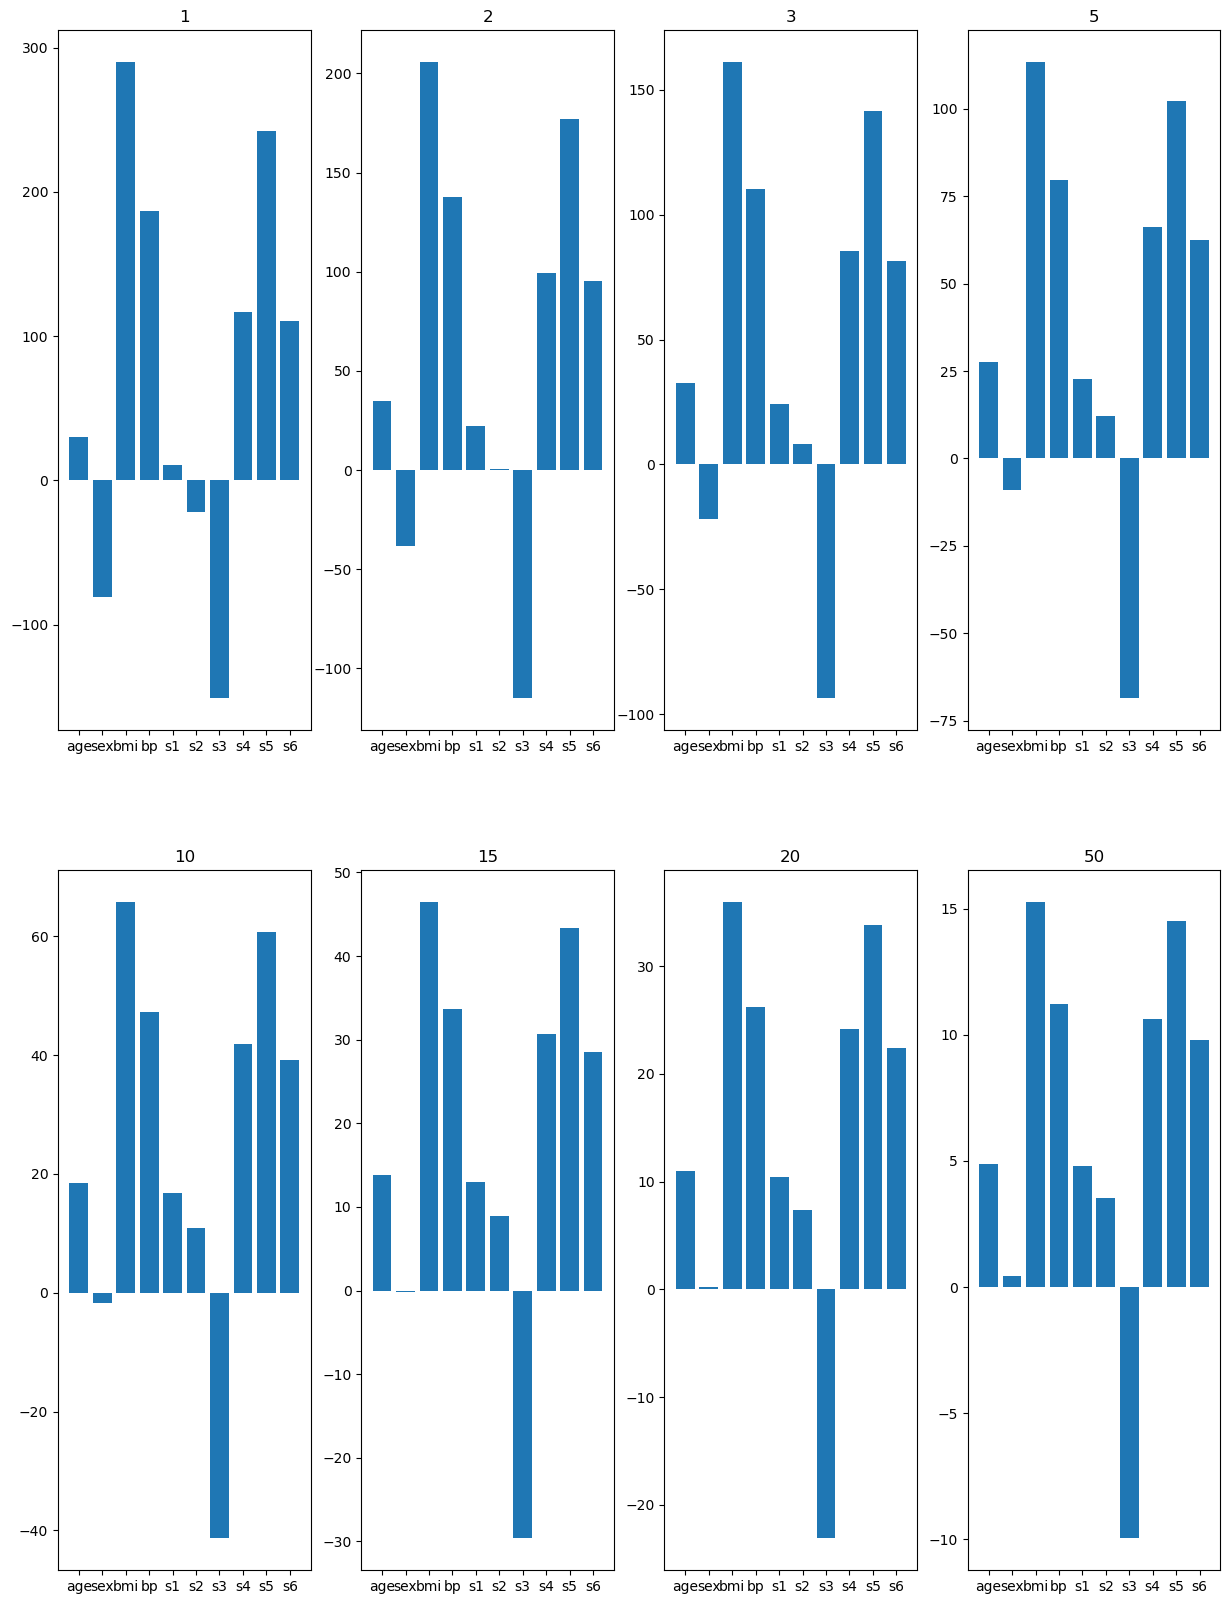

In [41]:
a = [1,2,3,5,10,15,20,50]
error = []
pos =1
plt.figure(figsize = (15,20))
for i in a:
    r = Ridge(alpha=i)
    r.fit(x_train,y_train)
    y_pred = r.predict(x_test)
    rsme = np.sqrt(mse(y_test,y_pred))
    error.append(rsme)
    plt.subplot(2,4,pos)
    plt.bar(x.columns,r.coef_)
    plt.title(i)
    pos +=1
print(error)

[55.0659448252393, 55.19383455467866, 60.21106516143419, 70.4635981228757, 73.26046048581938, 73.26046048581938, 73.26046048581938, 73.26046048581938, 73.26046048581938, 73.26046048581938]


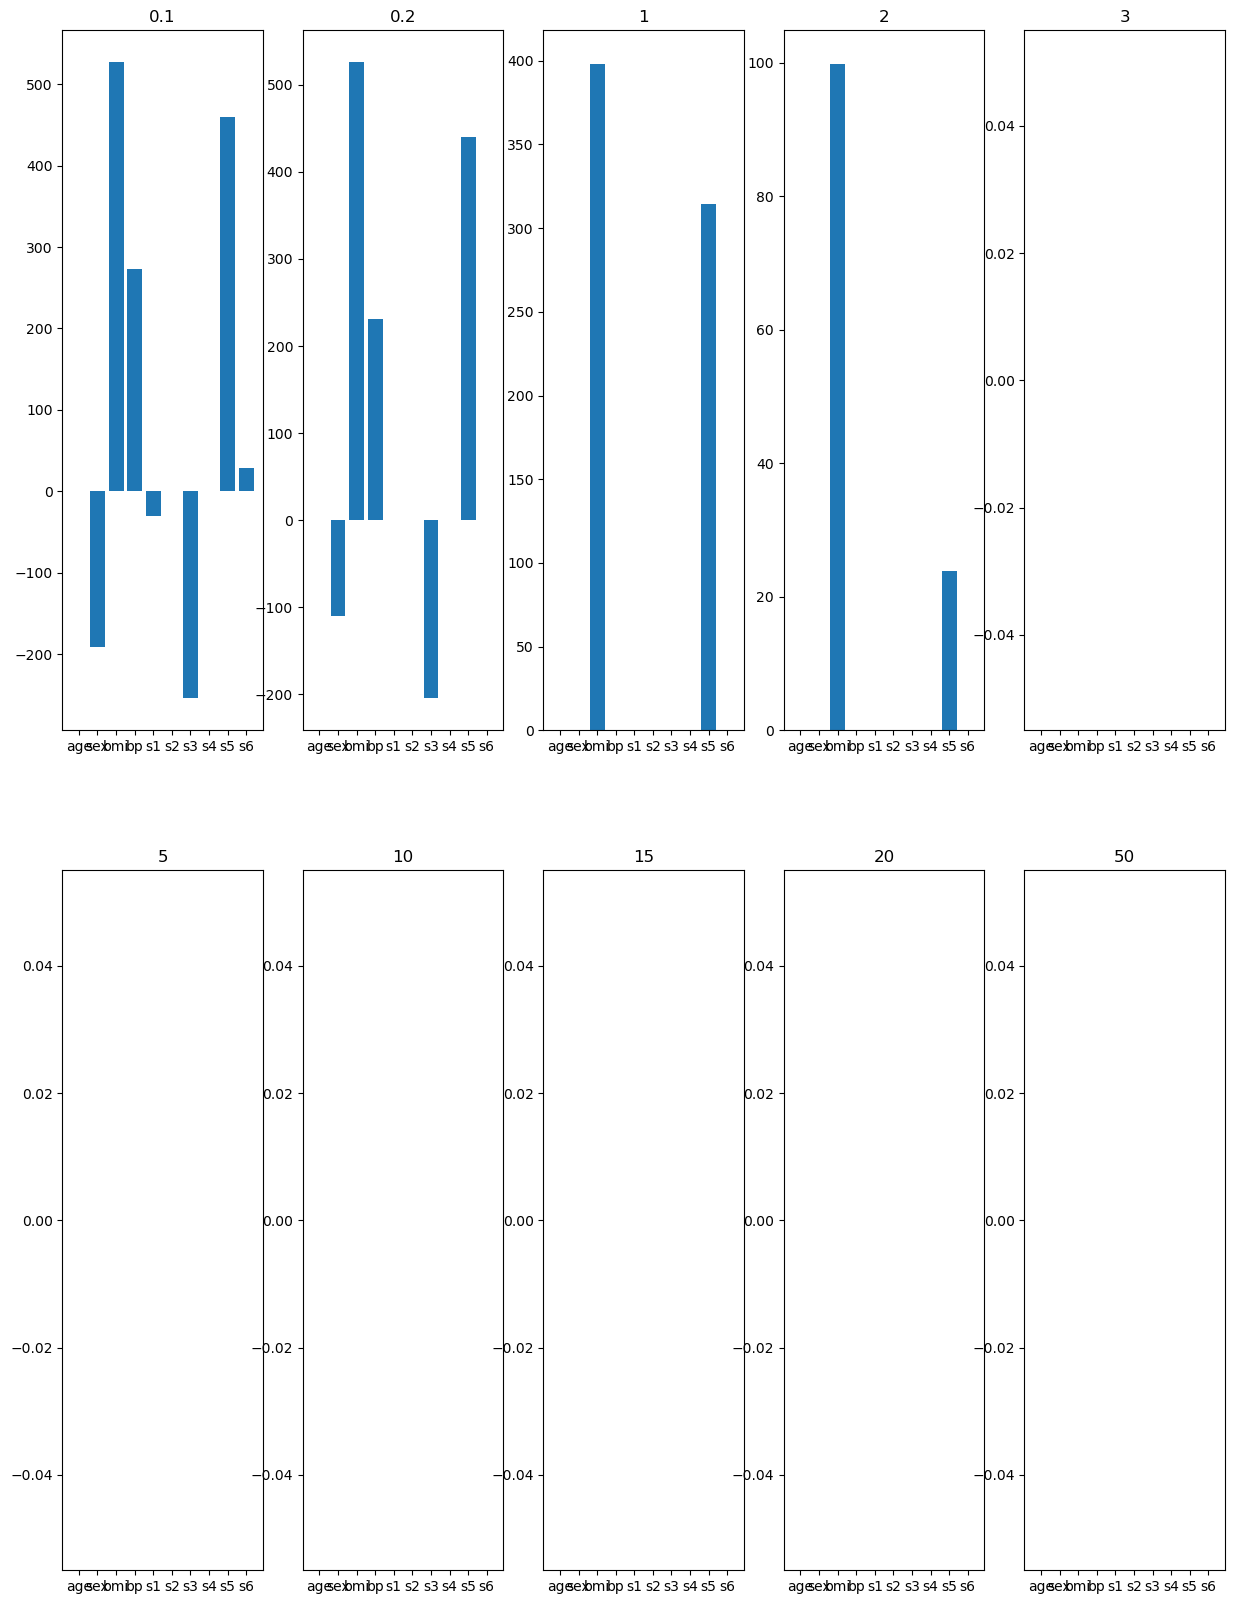

In [54]:
a = [0.1,0.2,1,2,3,5,10,15,20,50]
error = []
pos =1
plt.figure(figsize = (15,20))
for i in a:
    r = Lasso(alpha=i)
    r.fit(x_train,y_train)
    y_pred = r.predict(x_test)
    rsme = np.sqrt(mse(y_test,y_pred))
    error.append(rsme)
    plt.subplot(2,5,pos)
    plt.bar(x.columns,r.coef_)
    plt.title(i)
    pos +=1
print(error)